<a href="https://colab.research.google.com/github/canbethegodfatherofyourlife/MACD/blob/main/MACD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MACD - Moving Average Convergence & Divergence**

Moving Average Convergence Divergence (MACD) is a trend indicator.

MACD line is usually 12-day moving average minus the 26-day moving average.
 
The signal line is a 9-day EMA of MACD Line.

When the signal line falls below MACD line, we infer a bullish crossover, below the zero line and vice-versa.

The histograms show how close these two lines are.

**CODE**

In [3]:
import numpy as np
import pandas as pd
import talib as ta
import yfinance as yf
import matplotlib.pyplot as plt

In [4]:
# input
symbol = 'TSLA'
start = '2020-10-01'
end = '2021-10-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-01,440.760010,448.880005,434.420013,448.160004,448.160004,50741500
2020-10-02,421.390015,439.130005,415.000000,415.089996,415.089996,71430000
2020-10-05,423.350006,433.640015,419.329987,425.679993,425.679993,44722800
2020-10-06,423.790009,428.779999,406.049988,413.980011,413.980011,49146300
2020-10-07,419.869995,429.899994,413.850006,425.299988,425.299988,43127700


In [5]:
df['macd'], df['macdsignal'], df['macdhist'] = ta.MACD(df['Adj Close'], fastperiod=12, slowperiod=26, signalperiod=9)

In [6]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,macd,macdsignal,macdhist
Date,,,,,,,,,
2021-09-24,745.890015,774.799988,744.559998,774.390015,774.390015,21373000,14.064853,14.176828,-0.111975
2021-09-27,773.119995,799.000000,769.309998,791.359985,791.359985,28070700,16.355984,14.612659,1.743325
2021-09-28,787.200012,795.640015,766.179993,777.559998,777.559998,25381400,16.863783,15.062884,1.800899
2021-09-29,779.799988,793.500000,770.679993,781.309998,781.309998,20942900,17.368596,15.524027,1.844570
2021-09-30,781.000000,789.130005,775.000000,775.479980,775.479980,17956000,17.101100,15.839441,1.261659


In [7]:
df = df.dropna()

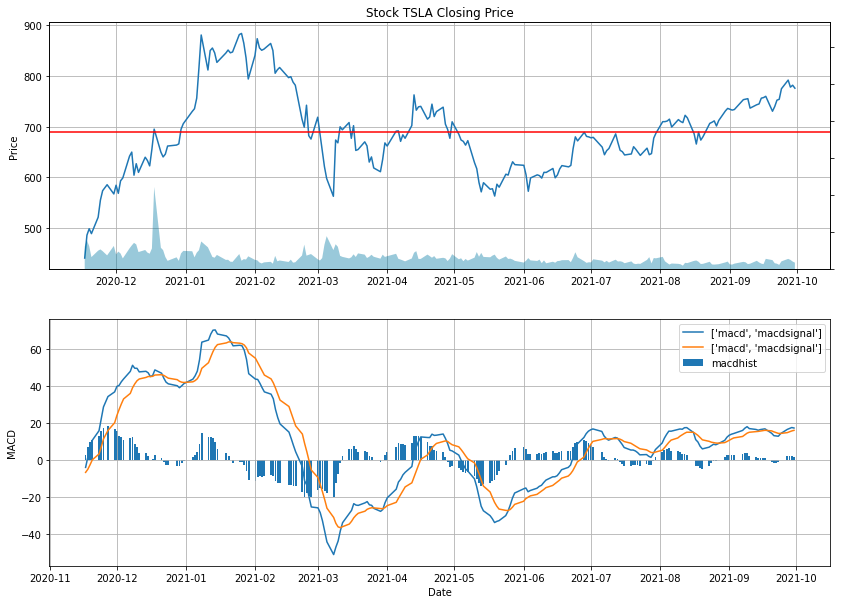

In [8]:
# Line Chart
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df.index, df['Adj Close'])
ax1.axhline(y=df['Adj Close'].mean(),color='r')
ax1.grid()
#ax1.grid(True, which='both')
#ax1.grid(which='minor', linestyle='-', linewidth='0.5', color='black')
#ax1.grid(which='major', linestyle='-', linewidth='0.5', color='red')
#ax1.minorticks_on()
#ax1.legend(loc='best')
ax1v = ax1.twinx()
ax1v.fill_between(df.index[0:],0, df.Volume[0:], facecolor='#0079a3', alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

labels = ['macd','macdsignal']
ax2 = plt.subplot(2, 1, 2)
ax2.plot(df[['macd','macdsignal']], label=labels)
ax2.bar(df.index, df['macdhist'], label='macdhist')
ax2.grid()
ax2.set_ylabel('MACD')
ax2.set_xlabel('Date')
ax2.legend(loc='best')